In [2]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, movie_reviews
import pandas as pd
import numpy as np
import re

stemmer = WordNetLemmatizer()
sw = stopwords.words('english')

### **Text Preprocessing**

#### Tokenization

In [5]:
file1 = movie_reviews.raw('pos/cv000_29590.txt')

In [6]:
file1_sent_token = nltk.sent_tokenize(file1)

In [7]:
file1_sent_token[:5]

["films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before .",
 "for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen .",
 'to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd .',
 'the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes .',
 "in other words , don't dismiss this film because of its source ."]

In [8]:
file1_word_token = nltk.word_tokenize(file1)

In [9]:
from nltk.probability import FreqDist

In [10]:
file1_fdist =  FreqDist(file1)
file1_fdist.most_common(10)

[(' ', 802),
 ('e', 380),
 ('t', 286),
 ('o', 244),
 ('a', 235),
 ('i', 233),
 ('n', 226),
 ('s', 213),
 ('r', 205),
 ('h', 179)]

In [11]:
file1_filtered_words = [w for w in file1_word_token if w not in sw]

In [12]:
cap_words = nltk.RegexpTokenizer(r'\w+')

In [13]:
file1_filtered_words = cap_words.tokenize(file1)

In [14]:
file1_filtered_words = [w for w in file1_filtered_words if w not in sw]

In [15]:
file1_filtered_words_fdist = FreqDist(file1_filtered_words)

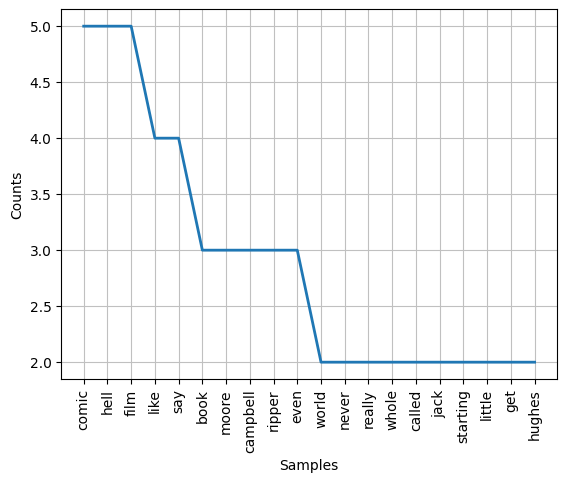

<Axes: xlabel='Samples', ylabel='Counts'>

In [16]:
file1_filtered_words_fdist.plot(20)

#### Bigrams, Trigrams, and N-grams

In [18]:
file2 = movie_reviews.raw('neg/cv009_29417.txt')

In [19]:
file2_words = nltk.word_tokenize(file2)

In [20]:
file2_filtered_words = [w.lower() for w in file2_words if w not in sw and len(w) > 2]

In [21]:
file2_bigrams = nltk.bigrams(file1_filtered_words)

In [22]:
file2_fdist = FreqDist(file2_bigrams)

In [23]:
file2_fdist.most_common(20)

[(('comic', 'book'), 2),
 (('say', 'moore'), 2),
 (('moore', 'campbell'), 2),
 (('jack', 'ripper'), 2),
 (('films', 'adapted'), 1),
 (('adapted', 'comic'), 1),
 (('comic', 'books'), 1),
 (('books', 'plenty'), 1),
 (('plenty', 'success'), 1),
 (('success', 'whether'), 1),
 (('whether', 'superheroes'), 1),
 (('superheroes', 'batman'), 1),
 (('batman', 'superman'), 1),
 (('superman', 'spawn'), 1),
 (('spawn', 'geared'), 1),
 (('geared', 'toward'), 1),
 (('toward', 'kids'), 1),
 (('kids', 'casper'), 1),
 (('casper', 'arthouse'), 1),
 (('arthouse', 'crowd'), 1)]

In [24]:
file2_trigrams = nltk.trigrams(file2_filtered_words)

In [25]:
file2_fdist_tri = FreqDist(file2_trigrams)

In [26]:
file2_fdist_tri.most_common(20)

[(('plot', 'young', 'french'), 1),
 (('young', 'french', 'boy'), 1),
 (('french', 'boy', 'sees'), 1),
 (('boy', 'sees', 'parents'), 1),
 (('sees', 'parents', 'killed'), 1),
 (('parents', 'killed', 'eyes'), 1),
 (('killed', 'eyes', 'tim'), 1),
 (('eyes', 'tim', 'roth'), 1),
 (('tim', 'roth', 'oops'), 1),
 (('roth', 'oops', 'mean'), 1),
 (('oops', 'mean', 'evil'), 1),
 (('mean', 'evil', 'man'), 1),
 (('evil', 'man', 'vows'), 1),
 (('man', 'vows', 'revenge'), 1),
 (('vows', 'revenge', 'man'), 1),
 (('revenge', 'man', 'taught'), 1),
 (('man', 'taught', 'ways'), 1),
 (('taught', 'ways', 'musketeer'), 1),
 (('ways', 'musketeer', 'old'), 1),
 (('musketeer', 'old', 'dude'), 1)]

In [27]:
file2_ngrams = nltk.ngrams(file2, n = 5)

In [28]:
file2_fdist_ngrams = FreqDist(file2_ngrams)

In [29]:
file2_fdist_ngrams.most_common(20)

[((' ', 't', 'h', 'e', ' '), 49),
 ((' ', '.', ' ', '.', ' '), 22),
 ((' ', 'a', 'n', 'd', ' '), 17),
 (('t', 'h', 'e', ' ', 'm'), 13),
 (('t', 'h', 'i', 's', ' '), 13),
 ((' ', 't', 'h', 'a', 't'), 12),
 (('t', 'h', 'a', 't', ' '), 12),
 ((' ', 't', 'h', 'i', 's'), 12),
 (('.', ' ', '.', ' ', '.'), 11),
 ((' ', 'f', 'o', 'r', ' '), 11),
 ((' ', 'o', 'f', ' ', 't'), 9),
 (('o', 'f', ' ', 't', 'h'), 9),
 ((' ', 'j', 'u', 's', 't'), 9),
 ((' ', 'f', 'i', 'l', 'm'), 9),
 (('f', ' ', 't', 'h', 'e'), 8),
 ((' ', 'm', 'o', 'v', 'i'), 8),
 (('m', 'o', 'v', 'i', 'e'), 8),
 ((' ', 'b', 'u', 't', ' '), 8),
 (('t', ' ', 't', 'h', 'e'), 7),
 ((' ', 'y', 'o', 'u', ' '), 7)]

#### Stemming and Lemmatization

In [31]:
file3 = movie_reviews.raw('neg\cv013_10494.txt')

In [32]:
sample = nltk.word_tokenize(file3)

In [33]:
filtered_words = [w.lower() for w in sample if w not in sw and len(w) > 2]

In [34]:
words_fdist = FreqDist(filtered_words)
top20 = words_fdist.most_common(20)

In [35]:
cap_words = nltk.RegexpTokenizer(r"\w+")

In [36]:
filtered_words = cap_words.tokenize(file3)

In [37]:
filtered_words = [w for w in filtered_words if w not in sw]

In [38]:
fdist = FreqDist(filtered_words)

In [39]:
top20 = fdist.most_common(20)

In [40]:
top20

[('movie', 27),
 ('first', 15),
 ('like', 7),
 ('fight', 6),
 ('mortal', 5),
 ('kombat', 5),
 ('one', 5),
 ('scene', 4),
 ('even', 4),
 ('many', 4),
 ('folks', 4),
 ('silly', 4),
 ('fan', 3),
 ('games', 3),
 ('earth', 3),
 ('shao', 3),
 ('khan', 3),
 ('game', 3),
 ('cast', 3),
 ('scenes', 3)]

In [41]:
from nltk import PorterStemmer

stm = PorterStemmer()

In [42]:
stem20 = [(stm.stem(w), count) for w, count in top20]

In [43]:
stem20

[('movi', 27),
 ('first', 15),
 ('like', 7),
 ('fight', 6),
 ('mortal', 5),
 ('kombat', 5),
 ('one', 5),
 ('scene', 4),
 ('even', 4),
 ('mani', 4),
 ('folk', 4),
 ('silli', 4),
 ('fan', 3),
 ('game', 3),
 ('earth', 3),
 ('shao', 3),
 ('khan', 3),
 ('game', 3),
 ('cast', 3),
 ('scene', 3)]

In [44]:
from nltk import WordNetLemmatizer

lemm = WordNetLemmatizer()

In [45]:
lemm20 = [(lemm.lemmatize(w), count) for w, count in top20]

In [46]:
lemm20

[('movie', 27),
 ('first', 15),
 ('like', 7),
 ('fight', 6),
 ('mortal', 5),
 ('kombat', 5),
 ('one', 5),
 ('scene', 4),
 ('even', 4),
 ('many', 4),
 ('folk', 4),
 ('silly', 4),
 ('fan', 3),
 ('game', 3),
 ('earth', 3),
 ('shao', 3),
 ('khan', 3),
 ('game', 3),
 ('cast', 3),
 ('scene', 3)]

#### POS tagging and NER

In [48]:
file4 = movie_reviews.raw('neg\cv018_21672.txt')

In [49]:
reg_filter = nltk.RegexpTokenizer(r'\w+')

In [50]:
# filter_words = reg_filter.tokenize(file4)

In [51]:
tokens = nltk.word_tokenize(file4)

In [52]:
pt_tokens = nltk.pos_tag(tokens)

In [53]:
pt_tokens[:20]

[('the', 'DT'),
 ('law', 'NN'),
 ('of', 'IN'),
 ('crowd', 'JJ'),
 ('pleasing', 'VBG'),
 ('romantic', 'JJ'),
 ('movies', 'NNS'),
 ('states', 'VBZ'),
 ('that', 'IN'),
 ('the', 'DT'),
 ('two', 'CD'),
 ('leads', 'NNS'),
 ('must', 'MD'),
 ('end', 'VB'),
 ('up', 'RP'),
 ('together', 'RB'),
 ('by', 'IN'),
 ('film', 'NN'),
 ("'s", 'POS'),
 ('end', 'NN')]

In [54]:
from nltk.corpus import shakespeare

In [55]:
shakespeare.fileids()

['a_and_c.xml',
 'dream.xml',
 'hamlet.xml',
 'j_caesar.xml',
 'macbeth.xml',
 'merchant.xml',
 'othello.xml',
 'r_and_j.xml']

In [56]:
file5 = shakespeare.words('dream.xml')

In [57]:
# filter_words = reg_filter.tokenize(file5)

In [58]:
sample = [w.lower() for w in file5 if w not in sw]

In [59]:
pt_words = nltk.pos_tag(sample)

In [60]:
ner_words = nltk.ne_chunk(pt_words)

In [61]:
print(ner_words)

(S
  a/DT
  midsummer/NN
  night/NN
  '/POS
  dream/NN
  dramatis/NN
  personae/NN
  theseus/NN
  ,/,
  duke/NN
  athens/NNS
  ./.
  egeus/NN
  ,/,
  father/RB
  hermia/NN
  ./.
  lysander/NN
  demetrius/NN
  love/NN
  hermia/NN
  ./.
  philostrate/NN
  ,/,
  master/NN
  revels/NNS
  theseus/VBP
  ./.
  quince/NN
  ,/,
  carpenter/NN
  ./.
  snug/NN
  ,/,
  joiner/NN
  ./.
  bottom/NN
  ,/,
  weaver/NN
  ./.
  flute/NN
  ,/,
  bellows/VBZ
  -/:
  mender/NN
  ./.
  snout/NN
  ,/,
  tinker/NN
  ./.
  starveling/NN
  ,/,
  tailor/NN
  ./.
  hippolyta/NN
  ,/,
  queen/JJ
  amazons/NNS
  ,/,
  betrothed/VBD
  theseus/NN
  ./.
  hermia/NN
  ,/,
  daughter/NN
  egeus/NN
  ,/,
  love/VB
  lysander/NN
  ./.
  helena/NN
  ,/,
  love/VB
  demetrius/NN
  ./.
  oberon/NN
  ,/,
  king/VBG
  fairies/NNS
  ./.
  titania/NN
  ,/,
  queen/JJ
  fairies/NNS
  ./.
  puck/NN
  ,/,
  robin/NN
  goodfellow/NN
  ./.
  peaseblossom/NN
  cobweb/NN
  moth/CC
  mustardseed/NN
  fairies/NNS
  ./.
  other/JJ
  fairi

#### spaCy analysis

In [63]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [64]:
file6 = nlp(movie_reviews.raw('neg\cv018_21672.txt'))

In [65]:
for token in file6: # Tokenization with spaCy
    print(token.text)

the
law
of
crowd
pleasing
romantic
movies
states
that
the
two
leads
must
end
up
together
by
film
's
end
.


if
you
're
not
familiar
with
this
law
,
then
maybe
you
've
seen
the
trailer
for
this
film
which
shows
that
the
two
leads
are
together
by
film
's
end
.


now
if
you
're
a
regular
reader
of
mine
,
you
've
heard
me
say
this
countless
times
:
you
know
how
drive
me
crazy
is
going
to
end
,
but
is
the
journey
to
get
to
that
ending
worth
it
?


no
,
it
definitely
is
not
.


melissa
joan
hart
(
from
abc
's
"
sabrina
,
the
teenage
witch
"
)
likes
a
hunky
stud
on
the
basketball
team
.


adrien
grenier
is
her
grungy
neighbor
who
's
just
broken
up
with
his
activist
girlfriend
.


apparently
he
wants
to
make
his
ex
-
girlfriend
jealous
enough
to
take
him
back
,
and
she
wants
someone
to
take
her
to
the
big
year
end
dance
.


so
the
two
pretend
to
date
for
some
reason
,
but
only
after
hart
gives
grenier
a
bath
to
turn
him
into
a
hunky
stud
.


will
grenier
like
his
new
popularity
and
turn
on
his

In [66]:
for token in file6: # Lemmatization with spaCy
    print(token.text, token.lemma_)

the the
law law
of of
crowd crowd
pleasing please
romantic romantic
movies movie
states state
that that
the the
two two
leads lead
must must
end end
up up
together together
by by
film film
's 's
end end
. .

 

if if
you you
're be
not not
familiar familiar
with with
this this
law law
, ,
then then
maybe maybe
you you
've have
seen see
the the
trailer trailer
for for
this this
film film
which which
shows show
that that
the the
two two
leads lead
are be
together together
by by
film film
's 's
end end
. .

 

now now
if if
you you
're be
a a
regular regular
reader reader
of of
mine mine
, ,
you you
've have
heard hear
me I
say say
this this
countless countless
times time
: :
you you
know know
how how
drive drive
me I
crazy crazy
is be
going go
to to
end end
, ,
but but
is be
the the
journey journey
to to
get get
to to
that that
ending end
worth worth
it it
? ?

 

no no
, ,
it it
definitely definitely
is be
not not
. .

 

melissa melissa
joan joan
hart hart
( (
from from
abc abc
's 's
"

In [67]:
for token in file6: # POS tagging with spaCy
    print(token.text,"---",token.pos_,"---",token.tag_)

the --- DET --- DT
law --- NOUN --- NN
of --- ADP --- IN
crowd --- NOUN --- NN
pleasing --- VERB --- VBG
romantic --- ADJ --- JJ
movies --- NOUN --- NNS
states --- VERB --- VBZ
that --- SCONJ --- IN
the --- DET --- DT
two --- NUM --- CD
leads --- NOUN --- NNS
must --- AUX --- MD
end --- VERB --- VB
up --- ADP --- RP
together --- ADV --- RB
by --- ADP --- IN
film --- NOUN --- NN
's --- PART --- POS
end --- NOUN --- NN
. --- PUNCT --- .

 --- SPACE --- _SP
if --- SCONJ --- IN
you --- PRON --- PRP
're --- AUX --- VBP
not --- PART --- RB
familiar --- ADJ --- JJ
with --- ADP --- IN
this --- DET --- DT
law --- NOUN --- NN
, --- PUNCT --- ,
then --- ADV --- RB
maybe --- ADV --- RB
you --- PRON --- PRP
've --- AUX --- VBP
seen --- VERB --- VBN
the --- DET --- DT
trailer --- NOUN --- NN
for --- ADP --- IN
this --- DET --- DT
film --- NOUN --- NN
which --- PRON --- WDT
shows --- VERB --- VBZ
that --- SCONJ --- IN
the --- DET --- DT
two --- NUM --- CD
leads --- NOUN --- NNS
are --- AUX --- VBP
to

In [68]:
play = shakespeare.xml('dream.xml')

In [69]:
def extract_text(file):
    text = ''.join(file.itertext()) # Combine text and text between tags
    return text.strip() # Remove leading/trailing whitespace

text = extract_text(play)

print(text)

A Midsummer Night's Dream




Dramatis Personae

THESEUS, Duke of Athens.
EGEUS, father to Hermia.


LYSANDER
DEMETRIUS
in love with Hermia.


PHILOSTRATE, master of the revels to Theseus.
QUINCE, a carpenter.
SNUG, a joiner.
BOTTOM, a weaver.
FLUTE, a bellows-mender.
SNOUT, a tinker.
STARVELING, a tailor.
HIPPOLYTA, queen of the Amazons, betrothed to Theseus.
HERMIA, daughter to Egeus, in love with Lysander.
HELENA, in love with Demetrius.
OBERON, king of the fairies.
TITANIA, queen of the fairies.
PUCK, or Robin Goodfellow.


PEASEBLOSSOM
COBWEB
MOTH
MUSTARDSEED
fairies.


Other fairies attending their King and Queen.
Attendants on Theseus and Hippolyta.


SCENE  Athens, and a wood near it.

A MIDSUMMER NIGHT'S DREAM

ACT I

SCENE I.  Athens. The palace of THESEUS.
Enter THESEUS, HIPPOLYTA, PHILOSTRATE, and
Attendants


THESEUS
Now, fair Hippolyta, our nuptial hour
Draws on apace; four happy days bring in
Another moon: but, O, methinks, how slow
This old moon wanes! she lingers my de

In [70]:
doc = nlp(text)

In [71]:
for ent in doc.ents:
    print(ent.text,"---",ent.label_)

Midsummer Night's Dream --- WORK_OF_ART
Dramatis Personae --- PERSON
Duke of Athens --- ORG
EGEUS --- ORG
Hermia --- GPE
Hermia --- GPE
Theseus --- GPE
QUINCE --- PERSON
SNUG --- ORG
FLUTE --- ORG
SNOUT --- ORG
STARVELING --- ORG
Amazons --- PERSON
Theseus --- GPE
HERMIA --- ORG
Egeus --- PERSON
Lysander --- GPE
TITANIA --- ORG
Robin Goodfellow --- PERSON
PEASEBLOSSOM --- ORG
COBWEB --- ORG
MOTH --- ORG
MUSTARDSEED --- ORG
Athens --- GPE
Athens --- GPE
four --- CARDINAL
Four days --- DATE
night --- TIME
Four nights --- DATE
the night --- TIME
Athenian --- NORP
Awake --- PERSON
Exit PHILOSTRATE
Hippolyta --- FAC
EGEUS --- ORG
HERMIA --- ORG
Egeus --- PERSON
Hermia --- GPE
Thou --- GPE
thou --- GPE
Lysander --- GPE
thou --- CARDINAL
Thou --- PERSON
Knacks --- ORG
Athens --- GPE
Hermia --- GPE
one --- CARDINAL
Hermia --- GPE
Thrice --- ORG
Grows --- ORG
Unto --- GPE
moon--
 --- WORK_OF_ART
that day --- DATE
Diana --- PERSON
Relent --- ORG
Hermia --- GPE
Lysander --- PERSON
Hermia --- GPE


In [72]:
from spacy import displacy

In [73]:
displacy.render(doc, style='ent')

### **Text Analysis**

#### Chunking and Chinking

In [76]:
review = movie_reviews.raw('pos\cv028_26746.txt')

In [77]:
sents = nltk.sent_tokenize(review)

In [78]:
top1 = nltk.word_tokenize(review)

In [79]:
filtertop1 = [w for w in top1 if len(w) > 2]

In [80]:
grammar = r"""
            NP: {<DT>?<JJ>*<NN.*>*}
            V: {<V.*>}
            PP: {<IN> <NP>}
            VP: {<V> <NP | PP>*}
            """

In [81]:
chunk_parser = nltk.RegexpParser(grammar)

In [82]:
tree = chunk_parser.parse(nltk.pos_tag(filtertop1))

In [83]:
tree

In [84]:
grammar = r"""
            Chunk: {<.*>+}
            }<VB.*?|IN|DT|TO>+{
            """

In [85]:
chink_parser = nltk.RegexpParser(grammar)

In [86]:
tree = chink_parser.parse(nltk.pos_tag(filtertop1))

In [87]:
tree

#### Context free grammar

In [89]:
grammar = nltk.CFG.fromstring(r"""
                                S -> NP VP
                                NP -> Det Nom | PropN
                                Nom -> Adj Nom | N
                                VP -> V Adj | V NP | V S | V NP PP
                                PP -> P NP
                                PropN -> "Buster" | "Chatterer" | "Joe"
                                Adj -> "angry" | "frightened" | "tall"
                                Det -> "a" | "the"
                                N -> "bear" | "squirrel" | "tree" | "fish" | "log"
                                V -> "chased" | "saw" | "said" | "thought" | "was" | "put"
                                P -> "on"
                                """)

In [90]:
sent = "Joe saw a squirrel on the  tree"

In [91]:
tok_word = nltk.word_tokenize(sent)

In [92]:
rd_parser = nltk.RecursiveDescentParser(grammar)

In [93]:
tree = rd_parser.parse(tok_word)

In [94]:
for tree in rd_parser.parse(tok_word):
    print(tree)

(S
  (NP (PropN Joe))
  (VP
    (V saw)
    (NP (Det a) (Nom (N squirrel)))
    (PP (P on) (NP (Det the) (Nom (N tree))))))


In [95]:
tree.draw()

### **Text Classification**

#### CountVectorizer

In [98]:
review = movie_reviews.raw('neg\cv048_18380.txt')

In [99]:
sents = nltk.sent_tokenize(review)

In [100]:
from sklearn.feature_extraction.text import CountVectorizer

In [101]:
count_vect = CountVectorizer(stop_words=stopwords.words('english'))

In [102]:
bagofwords = count_vect.fit_transform(sents)

In [103]:
bagofwords.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [104]:
feature_names = count_vect.get_feature_names_out()
print(feature_names)

['1992' 'actions' 'actors' 'actress' 'almost' 'also' 'among' 'andrzej'
 'angry' 'ariel' 'atmosphere' 'attempt' 'audience' 'author' 'avrech' 'bad'
 'bartkowiak' 'battling' 'becomes' 'belonged' 'belongs' 'better' 'bosses'
 'bride' 'cabalistic' 'case' 'category' 'certain' 'charming' 'colliding'
 'community' 'complicated' 'concluding' 'convincing' 'cop' 'creates'
 'crime' 'culture' 'decades' 'decides' 'depressed' 'develops' 'director'
 'easy' 'eden' 'educate' 'effectively' 'emily' 'enthusiasm' 'eric' 'even'
 'extent' 'feelings' 'fighter' 'film' 'films' 'first' 'flaw' 'followed'
 'formula' 'formulaic' 'gangsters' 'get' 'give' 'go' 'got' 'greatest'
 'griffith' 'guys' 'hamper' 'hand' 'happens' 'hassidic' 'help' 'heroine'
 'herring' 'hurt' 'important' 'insult' 'intended' 'investigation'
 'involves' 'involving' 'italian' 'jamey' 'jew' 'jeweller' 'jewish' 'lady'
 'lame' 'latter' 'least' 'lee' 'like' 'liked' 'locating' 'lumet' 'makes'
 'manners' 'melanie' 'men' 'mia' 'might' 'miscasting' 'missing

In [105]:
pd.DataFrame(bagofwords.toarray(), columns = feature_names)

,1992,actions,actors,actress,almost,also,among,andrzej,angry,ariel,...,weir,whose,witness,woman,work,works,worse,worst,york,young
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Tfidfvectorizer

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
tfidf_vectors = TfidfVectorizer(stop_words=stopwords.words('english'))

In [109]:
bagofwords = tfidf_vectors.fit_transform(sents)

In [110]:
bagofwords.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.20067438, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [111]:
feature_names = tfidf_vectors.get_feature_names_out()

In [112]:
pd.DataFrame(bagofwords.toarray(), columns = feature_names)

,1992,actions,actors,actress,almost,also,among,andrzej,angry,ariel,...,weir,whose,witness,woman,work,works,worse,worst,york,young
0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.358557,0.000000,0.000000,0.358557,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.301511,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.00000,0.325744,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.311062,0.000000,0.000000,0.00000,0.000000,0.000000,0.311062,0.000000,0.000000,0.000000,...,0.274423,0.000000,0.311062,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.239808,0.000000
5,0.000000,0.304596,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


#### Model Building - MultinomialNB

In [114]:
df = pd.read_csv('movie_reviews.csv')

In [115]:
df.head()

,text,tag
0,"the necklace's hundred-year-old former owner ,...",pos
1,"the dialogue is warbling , and basically just ...",neg
2,considering that the skeptic's best argument a...,pos
3,with its appropriate mixture of high kicks and...,pos
4,admittedly i haven't seen an episode of the te...,neg


In [116]:
df.shape

(64720, 2)

In [117]:
documents = []

for i in range(df.shape[0]):

    # Remove special charecters
    document = re.sub(r"\W", ' ', df.text[i])

    # Remove all single charecters
    document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)

    # Remove all single charecters from the start
    document = re.sub(r"\^[a-zA-Z]\s+", ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r"\s+", ' ', document, flags = re.I)

    # Lemmatizatoin
    document = nltk.word_tokenize(document)
    document = [stemmer.lemmatize(word) for word in document]

    document = ' '.join(document)
    documents.append(document)
    

In [118]:
print(documents[0])

the necklace hundred year old former owner rose dewitt bukater gloria stuart find brock to tell him her story


In [119]:
X = documents
y = df.tag

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=0)

In [122]:
from sklearn.feature_extraction.text import CountVectorizer

In [123]:
count_vectors = CountVectorizer(max_features = 1500, min_df = 5, max_df = 0.7, stop_words=sw)

In [124]:
count_train = count_vectors.fit_transform(X_train)
count_test = count_vectors.transform(X_test)

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [126]:
tfidf_vectors = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=sw)

In [127]:
tfidf_train = tfidf_vectors.fit_transform(X_train)
tfidf_test = tfidf_vectors.transform(X_test)

In [128]:
from sklearn.naive_bayes import MultinomialNB

**CountVectorizer Naive Bayes Classifier**

In [130]:
nb_classifier_countVec = MultinomialNB()

In [131]:
nb_classifier_countVec.fit(count_train, y_train)

MultinomialNB()

In [132]:
countVec_pred = nb_classifier_countVec.predict(count_test)

In [133]:
from sklearn.metrics import *

In [134]:
countVec_acc = accuracy_score(y_test, countVec_pred)

In [135]:
print(f"CountVectorizer NB Classifier Accuracy Score: {countVec_acc: .2f}")

CountVectorizer NB Classifier Accuracy Score:  0.60


In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
cm = confusion_matrix(y_test, countVec_pred, labels = df.tag.unique().tolist())

In [138]:
labels = df.tag.unique().tolist()

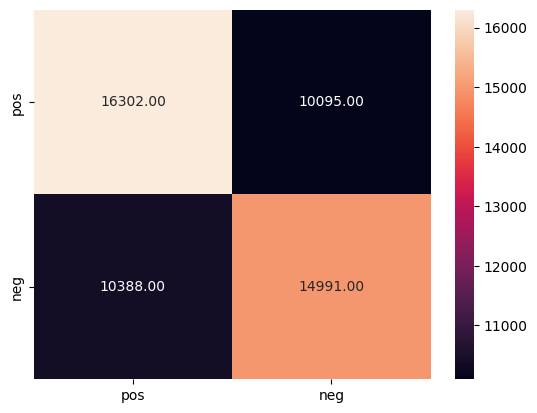

In [139]:
sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels=labels, yticklabels=labels)
plt.show()

In [140]:
print(classification_report(y_test, countVec_pred))

              precision    recall  f1-score   support

         neg       0.60      0.59      0.59     25379
         pos       0.61      0.62      0.61     26397

    accuracy                           0.60     51776
   macro avg       0.60      0.60      0.60     51776
weighted avg       0.60      0.60      0.60     51776



**TfidfVectorizer Naive Bayes Classifier**

In [142]:
nb_classifier_tfidf = MultinomialNB()

In [143]:
nb_classifier_tfidf.fit(tfidf_train, y_train)

MultinomialNB()

In [144]:
tfidf_pred = nb_classifier_tfidf.predict(tfidf_test)

In [145]:
tfidf_acc = accuracy_score(y_test, tfidf_pred)

In [146]:
print(f"Tfidf Accuracy score: {tfidf_acc: .2f}")

Tfidf Accuracy score:  0.61


In [147]:
cm = confusion_matrix(y_test, tfidf_pred, labels = labels)

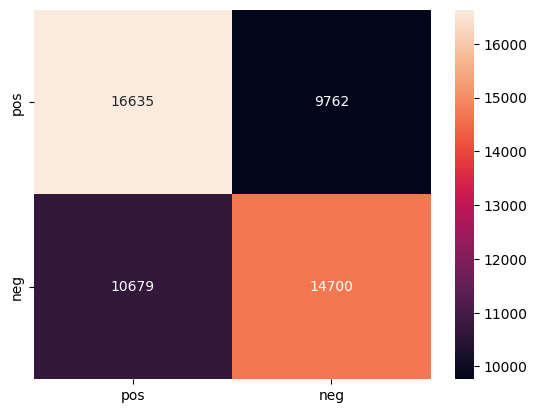

In [148]:
sns.heatmap(cm, annot = True, fmt = '.0f', xticklabels=labels, yticklabels=labels)
plt.show()

In [149]:
print(classification_report(y_test, tfidf_pred))

              precision    recall  f1-score   support

         neg       0.60      0.58      0.59     25379
         pos       0.61      0.63      0.62     26397

    accuracy                           0.61     51776
   macro avg       0.60      0.60      0.60     51776
weighted avg       0.61      0.61      0.60     51776

